# Classification Problem

In [1]:
import pandas as pd
iris_Data=pd.read_csv("Iris.csv")

In [2]:
iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_Data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_Data['Species'] = label_encoder.fit_transform(iris_Data['Species'])


In [7]:
iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [8]:
iris_Data.shape

(150, 6)

In [11]:
x=iris_Data.iloc[:,1:5]
y=iris_Data.Species


In [12]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [14]:
x_train.shape
#print(type(x_train))
#x_test.shape

(112, 4)

In [15]:
y_test.shape
#print(y_test)

(38,)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from livelossplot import PlotLossesKerasTF

In [18]:
irisModel=Sequential()
#irisModel.add(Input(shape=(4,)))
irisModel.add(Dense(8,input_dim= 4,activation='relu'))
irisModel.add(Dense(6,activation='relu'))
irisModel.add(Dense(4,activation='relu'))
irisModel.add(Dense(3,activation='softmax'))

In [22]:
irisModel.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [25]:
y_test_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

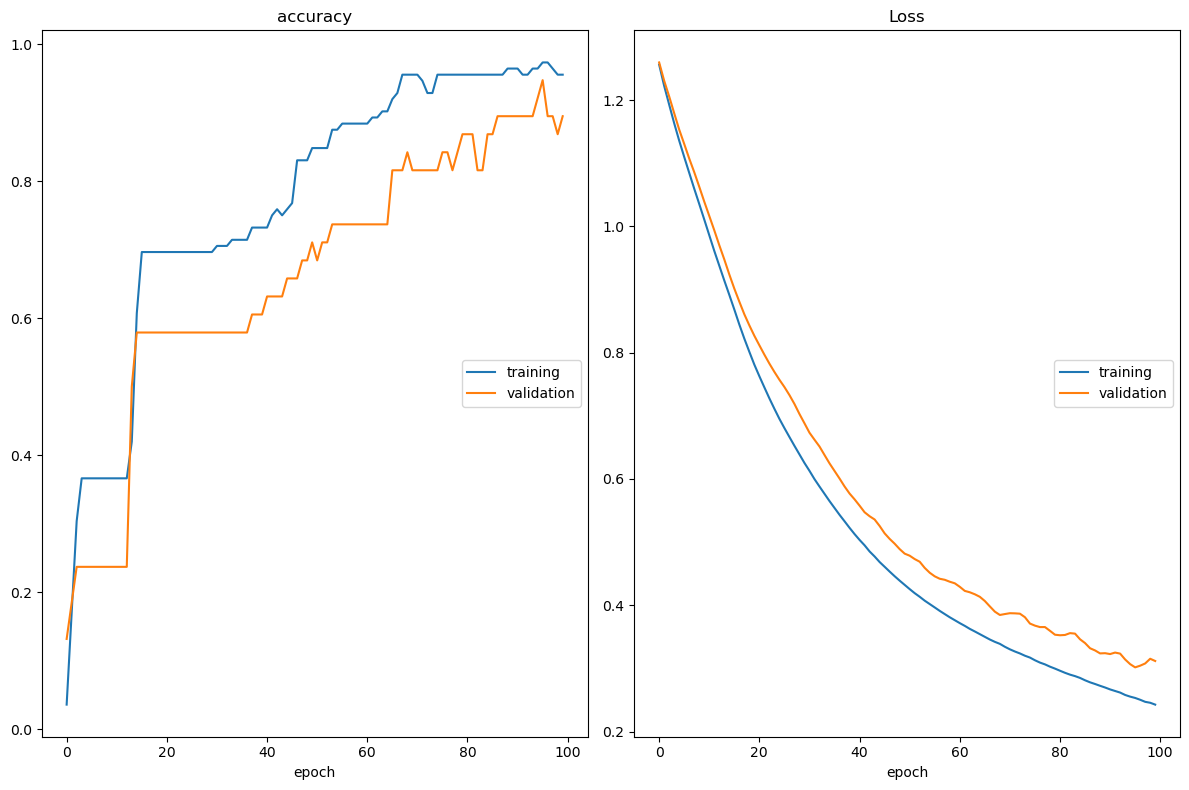

accuracy
	training         	 (min:    0.036, max:    0.973, cur:    0.955)
	validation       	 (min:    0.132, max:    0.947, cur:    0.895)
Loss
	training         	 (min:    0.243, max:    1.256, cur:    0.243)
	validation       	 (min:    0.302, max:    1.260, cur:    0.312)
4/4 [==============================] - 0s 120ms/step - loss: 0.2427 - accuracy: 0.9554 - val_loss: 0.3118 - val_accuracy: 0.8947


In [26]:
irisModel.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])


In [27]:
# Evaluate Method
score = irisModel.evaluate(x_test,y_test_encoded)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

2/2 [==============================] - 0s 0s/step - loss: 0.3118 - accuracy: 0.8947
Test loss: 31.179141998291016
Test accuracy: 89.47368264198303


In [28]:
y_train.value_counts()

2    41
0    37
1    34
Name: Species, dtype: int64

# Overfitting: L2 Regularization

In [29]:
from tensorflow.keras.regularizers import l2

In [30]:
irisModel=Sequential()
irisModel.add(Input(shape=(4,)))
irisModel.add(Dense(8,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(6,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(4,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(3,activation='softmax'))
irisModel.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

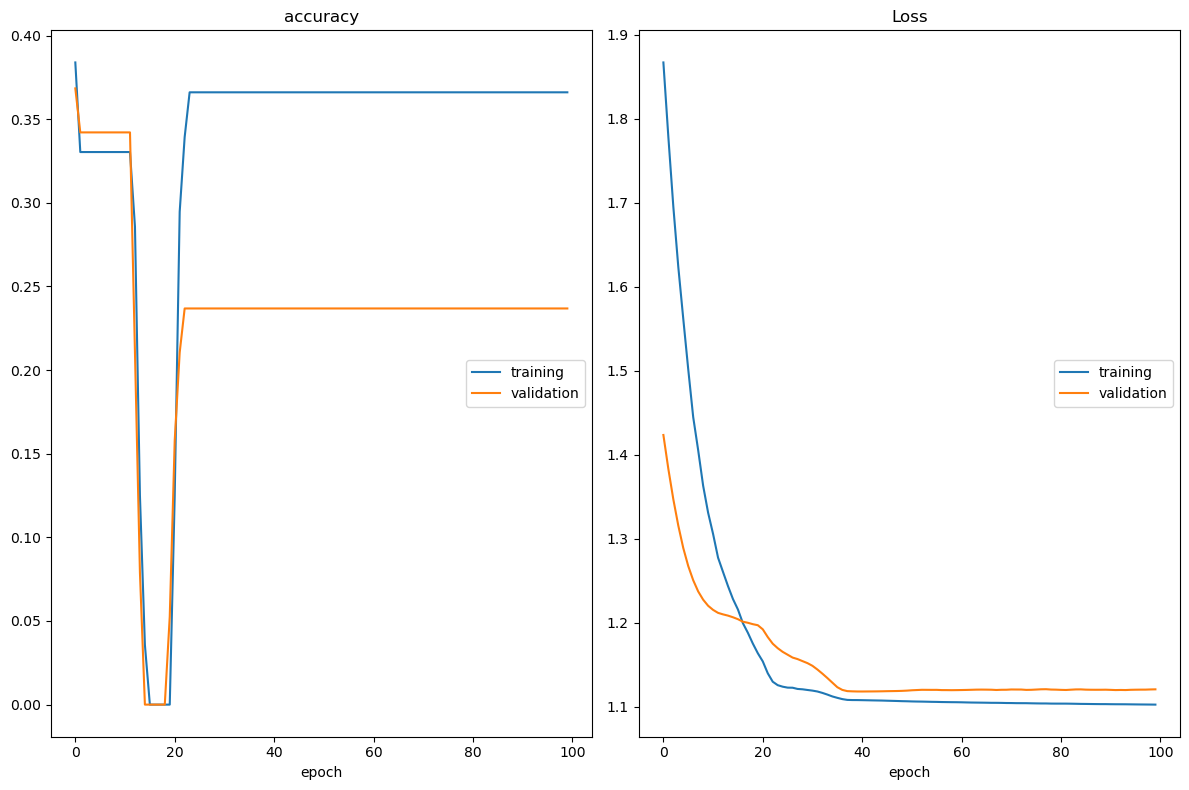

accuracy
	training         	 (min:    0.000, max:    0.384, cur:    0.366)
	validation       	 (min:    0.000, max:    0.368, cur:    0.237)
Loss
	training         	 (min:    1.103, max:    1.867, cur:    1.103)
	validation       	 (min:    1.118, max:    1.424, cur:    1.121)
4/4 [==============================] - 0s 155ms/step - loss: 1.1026 - accuracy: 0.3661 - val_loss: 1.1208 - val_accuracy: 0.2368


In [31]:
irisModel.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])

In [32]:
from sklearn.metrics import classification_report

In [33]:
irisModel.predict(x_test)

2/2 [==============================] - 1s 0s/step


array([[0.32516113, 0.315981  , 0.3588578 ],
       [0.33000675, 0.30571142, 0.3642818 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.33273202, 0.29993397, 0.36733398],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32867104, 0.30854267, 0.3627863 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.3306612 , 0.3043242 , 0.36501464],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32698888, 0.31210786, 0.3609033 ],
       [0.3262587 , 0.3136553 , 0.36008605],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32530886, 0.31566808, 0.3590231 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.32516113, 0.315981  , 0.3588578 ],
       [0.

In [34]:
irisModel.predict(x_test).argmax(axis=1)

2/2 [==============================] - 0s 0s/step


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [35]:
# Demonstration of argmax
import numpy as np

In [36]:
a=np.array([[120,45,890],[1,5,2],[100,20,23]])

In [37]:
a

array([[120,  45, 890],
       [  1,   5,   2],
       [100,  20,  23]])

In [38]:
a.argmax(axis=1)

array([2, 1, 0], dtype=int64)

In [39]:
train_pred=irisModel.predict(x_train).argmax(axis=1)
test_pred=irisModel.predict(x_test).argmax(axis=1)

2/2 [==============================] - 0s 5ms/step


In [43]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.97      0.99        34
           2       0.98      1.00      0.99        41

    accuracy                           0.99       112
   macro avg       0.99      0.99      0.99       112
weighted avg       0.99      0.99      0.99       112



In [40]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.00      0.00      0.00        16
           2       0.24      1.00      0.38         9

    accuracy                           0.24        38
   macro avg       0.08      0.33      0.13        38
weighted avg       0.06      0.24      0.09        38



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
y_train.value_counts()

2    41
0    37
1    34
Name: Species, dtype: int64

In [42]:
y_test.value_counts()

1    16
0    13
2     9
Name: Species, dtype: int64

# L1 Regularization

In [43]:
# L1 Regularization
from tensorflow.keras.regularizers import l1

In [44]:
irisModel1=Sequential()
irisModel1.add(Input(shape=(4,)))
irisModel1.add(Dense(8,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(6,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(4,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(3,activation='softmax'))
irisModel1.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

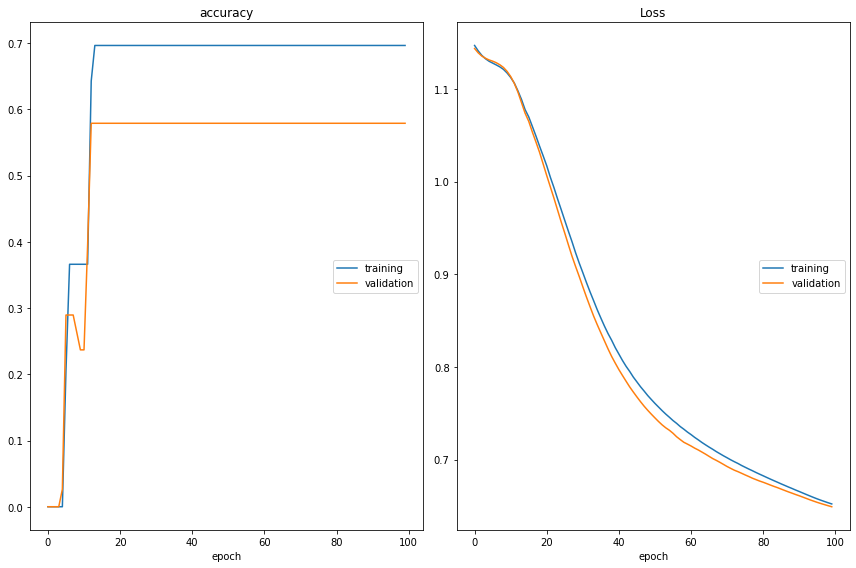

accuracy
	training         	 (min:    0.000, max:    0.696, cur:    0.696)
	validation       	 (min:    0.000, max:    0.579, cur:    0.579)
Loss
	training         	 (min:    0.652, max:    1.147, cur:    0.652)
	validation       	 (min:    0.649, max:    1.144, cur:    0.649)
4/4 [==============================] - 0s 121ms/step - loss: 0.6521 - accuracy: 0.6964 - val_loss: 0.6491 - val_accuracy: 0.5789


In [52]:
irisModel1.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])

# Demonstration of Dropout

In [55]:
# Dropout
from tensorflow.keras.layers import Dense, Dropout,Input
irisModel2=Sequential()
irisModel2.add(Input(shape=(4,)))

irisModel2.add(Dense(8,activation='relu'))
irisModel2.add(Dropout(0.30))

irisModel2.add(Dense(6,activation='relu'))
irisModel2.add(Dropout(0.30))

irisModel2.add(Dense(4,activation='relu'))
irisModel2.add(Dropout(0.30))

irisModel2.add(Dense(3,activation='softmax'))
irisModel2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

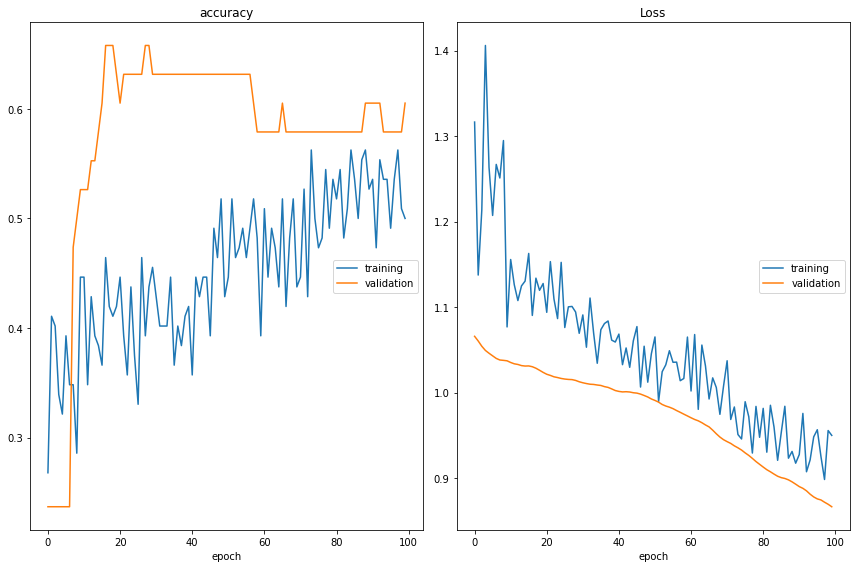

accuracy
	training         	 (min:    0.268, max:    0.562, cur:    0.500)
	validation       	 (min:    0.237, max:    0.658, cur:    0.605)
Loss
	training         	 (min:    0.898, max:    1.406, cur:    0.950)
	validation       	 (min:    0.866, max:    1.066, cur:    0.866)
4/4 [==============================] - 0s 134ms/step - loss: 0.9498 - accuracy: 0.5000 - val_loss: 0.8663 - val_accuracy: 0.6053


In [56]:
irisModel2.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])

# Demonstration of Dropout with Regularization

In [53]:
# Dropout
from tensorflow.keras.layers import Dense, Dropout,Input
irisModel3=Sequential()
irisModel3.add(Input(shape=(4,)))

irisModel3.add(Dense(8,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel3.add(Dropout(0.30))

irisModel3.add(Dense(6,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel3.add(Dropout(0.30))

irisModel3.add(Dense(4,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel3.add(Dropout(0.30))

irisModel3.add(Dense(3,activation='softmax'))
irisModel3.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

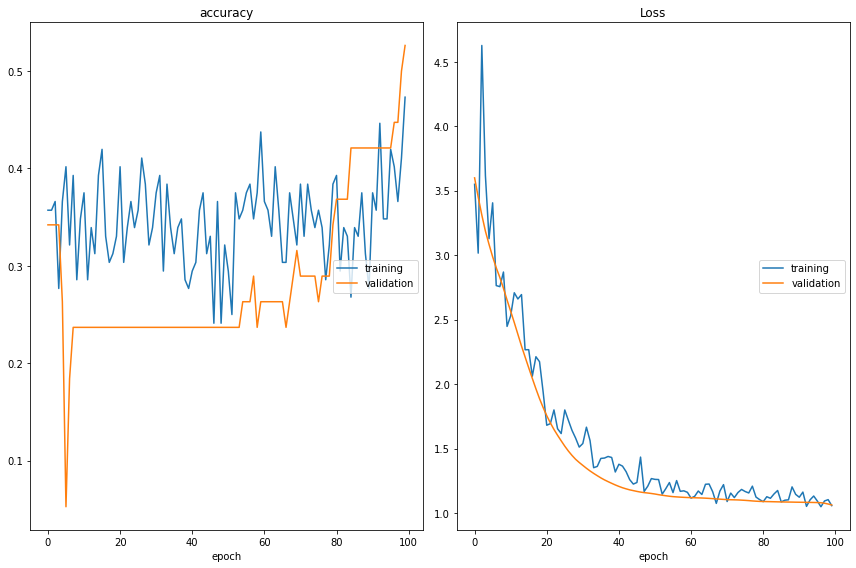

accuracy
	training         	 (min:    0.241, max:    0.473, cur:    0.473)
	validation       	 (min:    0.053, max:    0.526, cur:    0.526)
Loss
	training         	 (min:    1.048, max:    4.626, cur:    1.057)
	validation       	 (min:    1.062, max:    3.599, cur:    1.062)
4/4 [==============================] - 0s 123ms/step - loss: 1.0570 - accuracy: 0.4732 - val_loss: 1.0621 - val_accuracy: 0.5263


In [54]:
irisModel3.fit(x_train,y_train_encoded,epochs=100,validation_data=(x_test,y_test_encoded),callbacks=[PlotLossesKerasTF()])